In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np



In [9]:
image= cv2.imread("chess.png")


In [10]:
grey_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

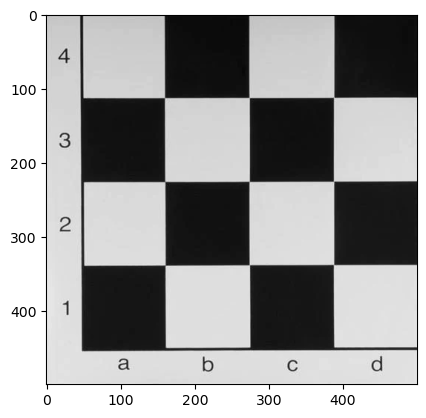

In [11]:
plt.gray()
plt.imshow(grey_image)

In [12]:
grey_image

array([[188, 204, 192, ...,  34,  34,  34],
       [198, 216, 204, ...,  31,  31,  31],
       [184, 202, 190, ...,  30,  30,  30],
       ...,
       [213, 239, 223, ..., 212, 215, 224],
       [214, 240, 224, ..., 220, 224, 232],
       [217, 242, 226, ..., 225, 228, 236]], dtype=uint8)

In [13]:
grey_image.shape

(499, 500)

In [14]:
sobelX=[[-1,0,1],[-2,0,2],[-1,0,1]]
sobelY=[[-1,-2,-1],[0,0,0],[1,2,1]]

In [15]:
def getCoord(kernel):
    center_filter=[1,1]
    xRows=[0,0,1,-1,1,-1,1,-1]
    yRows=[-1,1,0,0,-1,-1,1,1]
    for k in range(8):
        pixel_in_filterX= center_filter[0]+xRows[k]
        pixel_in_filterY= center_filter[1]+yRows[k]
        print('(cor {},{})-value:{}'.format(pixel_in_filterX,pixel_in_filterY,kernel[pixel_in_filterX][pixel_in_filterY]))

In [16]:
getCoord(sobelX)

(cor 1,0)-value:-2
(cor 1,2)-value:2
(cor 2,1)-value:0
(cor 0,1)-value:0
(cor 2,0)-value:-1
(cor 0,0)-value:-1
(cor 2,2)-value:1
(cor 0,2)-value:1


In [17]:
getCoord(sobelY)

(cor 1,0)-value:0
(cor 1,2)-value:0
(cor 2,1)-value:2
(cor 0,1)-value:-2
(cor 2,0)-value:1
(cor 0,0)-value:-1
(cor 2,2)-value:1
(cor 0,2)-value:-1


In [ ]:
def conv(grey_image,kernel):
    transformed=np.copy(grey_image)
    m = transformed.shape[0]
    n = transformed.shape[1]
    print(m,n)
    
    for i in range(m-1):
        for j in range(n-1):
            center_pixel = [i,j]
            center_filter = [1,1]
            xRows=[0,0,1,-1,1,-1,1,-1]
            yRows=[-1,1,0,0,-1,-1,1,1]
            new_val=0.0
            for k in range(8):
                item = [xRows[k],yRows[k]]
                pixel_in_imageX = center_pixel[0]+item[0] #các pixel xung quanh
                pixel_in_imageY = center_pixel[1]+item[1]
                pixel_in_filterx = center_filter[0]+ item[0]#các filter xung quanh
                pixel_in_filterx = center_filter[1]+ item[1]
                
                new_val += kernel[pixel_in_filterx][pixel_in_filterx] * grey_image[pixel_in_imageX,pixel_in_imageY]
            
            new_val += grey_image[i,j]*kernel[1][1]
            if new_val < 0:
                new_val = 0
            if new_val > 255:
                new_val = 255
            print(new_val)
            transformed[i,j]=new_val * 1
    return transformed 
            

<function matplotlib.pyplot.show(close=None, block=None)>

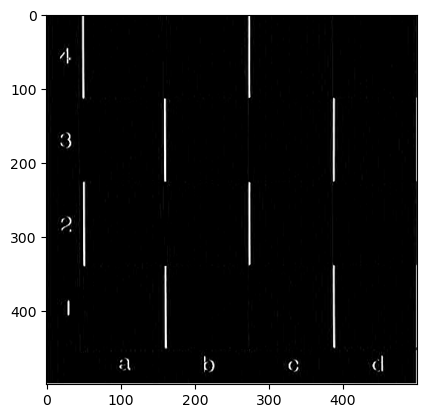

In [32]:
result=conv(grey_image,sobelX)
plt.imshow(result)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

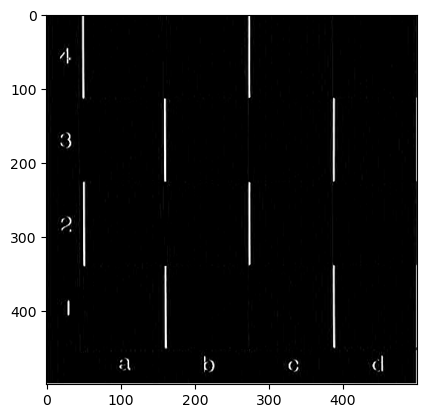

In [34]:
result2= conv(grey_image,sobelY)
plt.imshow(result2)
plt.show

In [31]:
def maxpool(image):
    m=len(image)#chiều cao bức ảnh
    n=len(image[0])#Chiều rộng bức ảnh
    new_image = np.zeros((m//2 + 1,n//2 + 1))
    xRows=[1,1,0]
    yRows=[0,1,1]
    for i in range(0,m,2):
        for j in range(0,n,2):
            currenPixel = [image[i][j]]
            for k in range(3):
                neighbor_x = i + xRows[k]
                neighbor_y = j + yRows[k]
                if neighbor_x<m and neighbor_y < n:
                    currenPixel.append(image[neighbor_x][neighbor_y])
                new_image[i//2][j//2] = max(currenPixel)
    return new_image

In [32]:
result3=maxpool(result)

<function matplotlib.pyplot.show(close=None, block=None)>

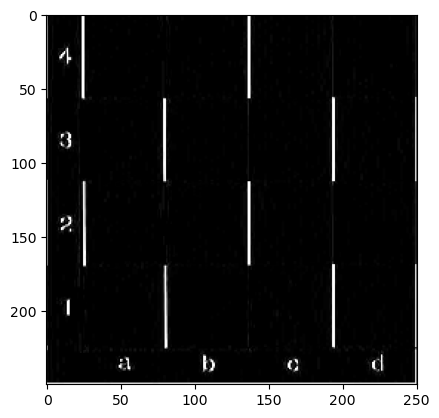

In [33]:
plt.imshow(result3)
plt.show